# Machine learning Project End to End

## Customer Bank Churn

# Autor

* Esponda Chaux, Sebastian : sebasespon11@gmail.com
* Github Username : Sebasespon

# Tabla de contenidos

* Introduction

* Data Loading

* End Data Loading

* Exploratory Data Analysis

* Feature Engineering

* Machine Learning Models

* Evalution Modeling

* Summary

# Glosario términos

1. RowNumber: Número de fila de cada observación.

2. CustomerID: El código de indentificación del cliente.

3. Surname: Los nombres y apellidos del cliente.

4. CreditScore: Puntuación de crédito que el banco le da a los clientes.

5. Geography: País de residencia de los clientes en este caso hay 3 (Francia, Alemania, España).

6. Gender: El género del cliente. 

7. Age: Edad del cliente.

8. Tenure: Años de antiguedad del cliente en el banco 

9. Balance: Balance de la cuenta bancaria del cliente.

10. NumOfProducts: Se refiere a la cantidad de proudctos bancarias que tienen contratado.

11. HasCrCard: Si tiene tarjeta de crédito

12. IsActiveMember: Clasifica a clientes activos como 1 y a los no activos como 0 

13. EstimatedSalary: El salario estimado del cliente

14. Exited: Si el cliente se va del banco ( 1), si se queda en el banco (0)




# Introduction

   El objetivo del siguiente proyecto es realizar un proceso de machine learning de principio a fin.
   Durante el proceso se realizarán todas las fases que cubren un proyecto de analitica avanzada.
   El objeto de estudio será un conjunto de datos que contiene información de los clientes de un banco
   el objetivo principal es determinar en base a la información de cada cliente, si un cliente se irá de la empresa "Churn" (1)
   o si no se va de la empresa "No Churn" (0).
   
   En el proyecto se tratarán y analizarán los datos mediante estadística descriptiva y gráficos  para posteriormente hacer una    serie de transformaciones sobre los mismo y contruir distintos modelos de machine learning como SVM, Regresión Logistica.
   
   Una vez creado distintos modelos se procederá a su evaluación de métricas para determinar que modelo predice mejor
   los clientes que abandonarán la compañía.
   

In [2]:
# Cargamos las librerias que se utilizarán

# Data processing

import pandas as pd
import numpy as np

# Semilla de aleatoriedad
import random

# Barajar los datos 
from sklearn.utils import shuffle

# Data viz

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



# Pipelines y preprocesado
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Model fine-tuning and evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scikitplot as skplt


# Hide system warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")



In [3]:
# INI Data loading

data = pd.read_csv("Churn_Modeling.csv")

# END Data Loading

## Exploratory Data analysis

In [4]:
# Initial Inspection
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


En el dataset hay 11 variables númericas y 3 variables tipo objeto

In [5]:
print('El conjunto de datos tiene', data.shape[0] ,'columnas y', data.shape[1], 'filas')

El conjunto de datos tiene 10000 columnas y 14 filas


In [6]:
# A continuación observamos con describe las principales estadisticas de las variables númericas
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


En este breve resumen de estadisticas:
* La columna rownumber será eliminada puesto que es el indíce.
* La edad media de los clientes del banco es de 39 años.
* Tenure es el número de años que el cliente lleva en el banco, la media son 5 años.
* Numero de productos contratados es de maximo 4 y la media esta en 1.5.



In [7]:
# Vemos las 5 primeras filas
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


De aqui podemos extraer como conclusiones:
* Hay algunas variables categóricas que deberán ser transformadas cuando haya que modelar (geografía,gender,surname)
* La gran mayoria son variables númericas sobre esta habrá que hacer transformaciones para estandarizarlas
* Columnas como Rownumber se pueden eliminar ya que no aportan información, el ID también 

In [8]:
# Comprobemos si existen valores nulos 
total = data.isnull().sum().sort_values(ascending=False)

percent_1 = data.isnull().sum()/data.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(15)

,Total,%
Exited,0,0.0
EstimatedSalary,0,0.0
IsActiveMember,0,0.0
HasCrCard,0,0.0
NumOfProducts,0,0.0
Balance,0,0.0
Tenure,0,0.0
Age,0,0.0
Gender,0,0.0
Geography,0,0.0


En nuestro dataset no existen valores nulos.

In [9]:
# Comprobamos si existen valores duplicados
sum(data.duplicated())

0

No existen filas duplicadas, en caso de existirlas se deberían borrar

## Exploratory Data Analysis

<Figure size 1152x576 with 0 Axes>

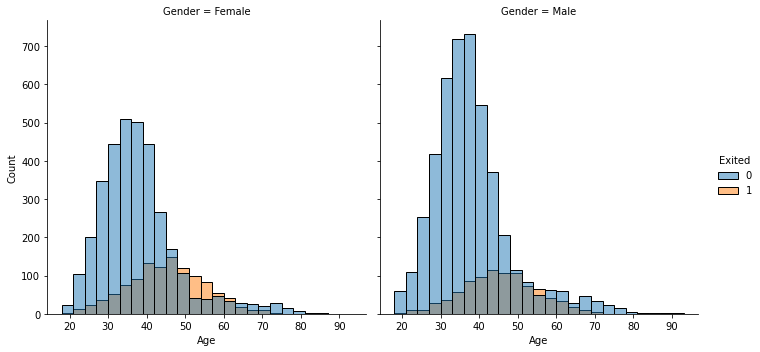

In [10]:
# Distribución de la edad por género y Exited 
plt.figure(figsize=(16,8))

sns.displot(
            data,
            x="Age",
            col = 'Gender', 
            hue = 'Exited', 
            binwidth=3,)


<Figure size 1152x576 with 0 Axes>

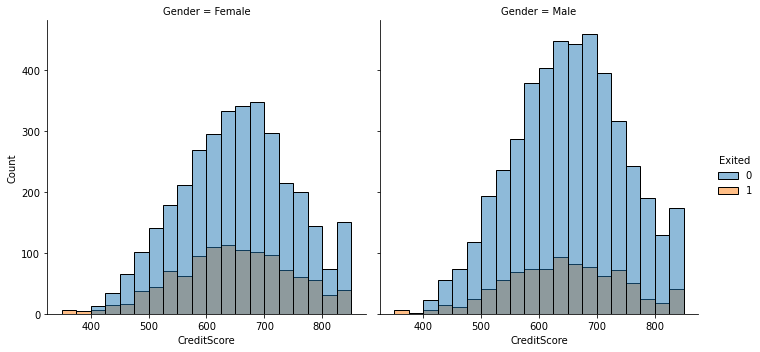

In [12]:
# Credit Score en funcion del genero y se ven los fugados
plt.figure(figsize=(16,8))

sns.displot(
            data,
            x="CreditScore",
            col = 'Gender', 
            hue = 'Exited',
            bins = 20)

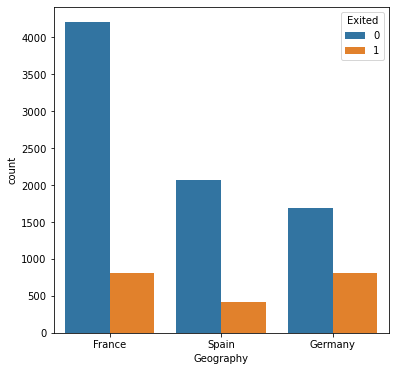

In [13]:
# Fugados por geografía
plt.figure(figsize=(6,6))

sns.countplot(data = data , x = 'Geography', hue = 'Exited')

plt.show()

En este caso lo mas destacado, esque en Alemania la mitad de los clientes se han ido.

Para Francia y España la proporción de clientes que se quedan es ampliamente mayor a la de los que se van

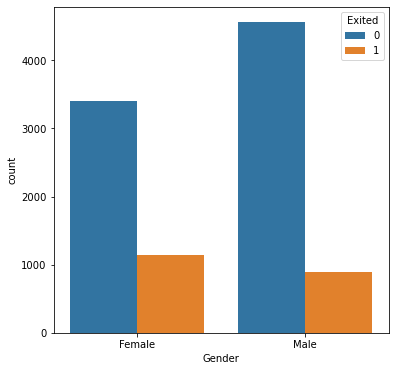

In [14]:
# Countplot distribución del género
plt.figure(figsize=(6,6))

sns.countplot(data = data , x = 'Gender', hue = 'Exited')

plt.show()

In [15]:
 # Estilo de las visualizaciones 
sns.set_palette('icefire')

plt.style.use('ggplot')
# paleta de colores
color_sexo = {'Female': 'blue',
             'Male': 'green'}

<AxesSubplot:xlabel='Exited', ylabel='count'>

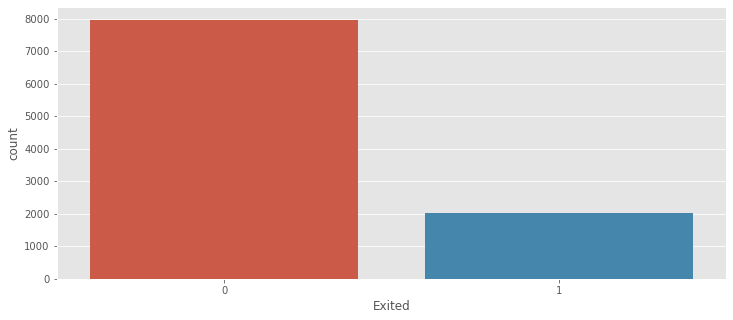

In [18]:
# Countplot distribución de los datos 
f, plt.subplots(figsize=(12, 5))
sns.countplot(data=data, x = 'Exited')

Text(0, 0.5, 'Count')

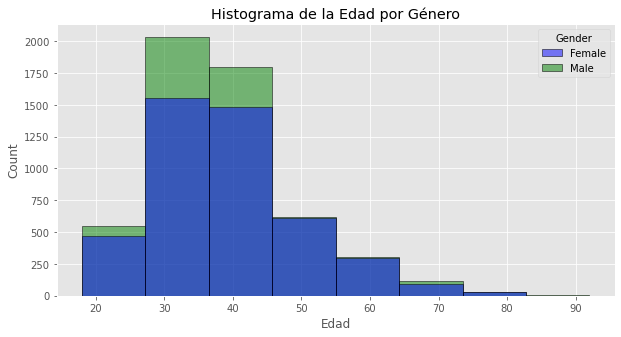

In [17]:
# Histograma de la edad en función del Género

f, ax = plt.subplots(figsize=(10, 5))

# diccionario para asignar los colores 

p = sns.histplot(x='Age', 
                data=data, 
                hue='Gender',
                edgecolor='black',
                palette= color_sexo,
                bins=8)

p.set_title("Histograma de la Edad por Género")
p.set_xlabel("Edad")
p.set_ylabel("Count")

Text(0, 0.5, 'Count')

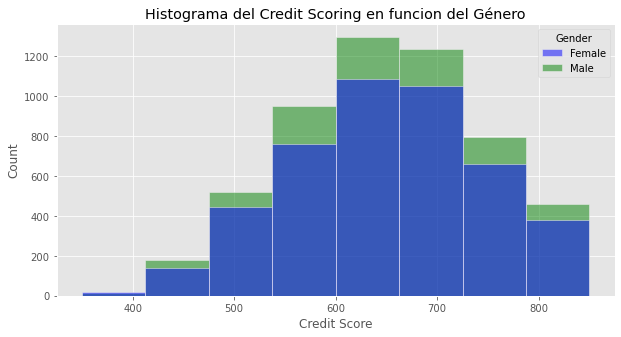

In [19]:
# Histograma del Credit Score en función del Sexo
f, ax = plt.subplots(figsize=(10, 5))

# diccionario para asignar los colores 

p = sns.histplot(x='CreditScore', 
                data=data, 
                hue='Gender',
                palette= color_sexo,
                bins=8)

p.set_title("Histograma del Credit Scoring en funcion del Género")
p.set_xlabel("Credit Score")
p.set_ylabel("Count")

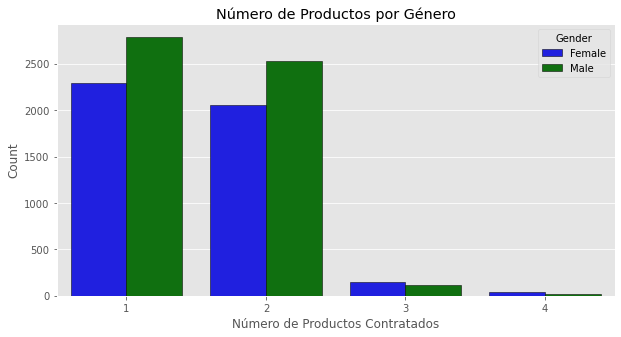

In [33]:
#Numero de productos en función del sexo
f, plt.subplots(figsize=(10, 5))

p = sns.countplot(
    x='NumOfProducts',
    data=data,
    hue="Gender",
    palette=color_sexo,
    edgecolor='black');
p.set_title('Número de Productos por Género')
p.set_xlabel('Número de Productos Contratados')
p.set_ylabel('Count');

Text(0.5, 1.0, 'Scatter Plot Edad - Balance')

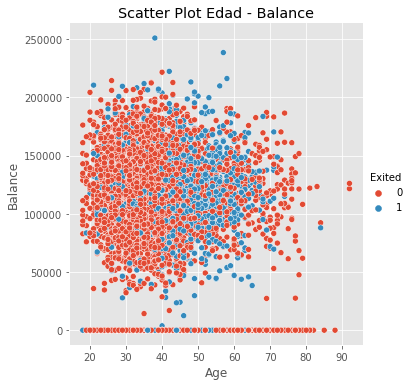

In [37]:
#SCatter Plot
# Gráfico scatter Edad y Balance
sns.relplot(x="Age", y="Balance", hue="Exited",data=data)
plt.title('Scatter Plot Edad - Balance')

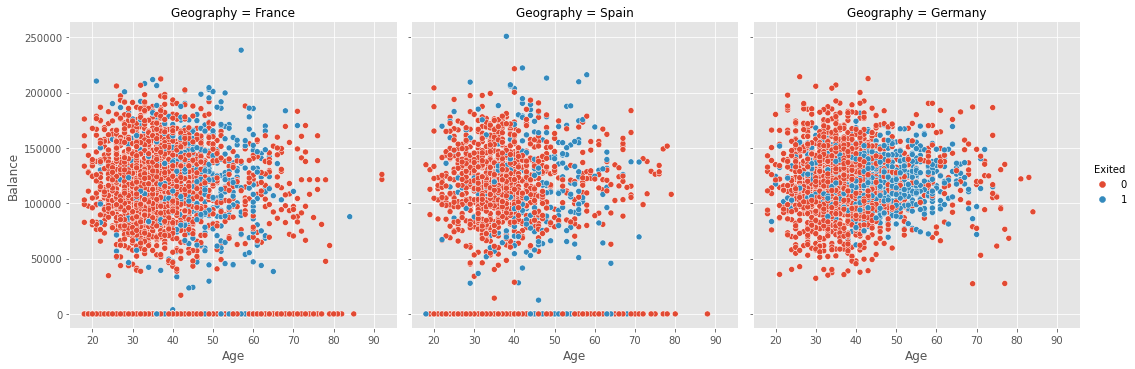

In [22]:
sns.relplot(x="Age", y="Balance", hue="Exited",
            col="Geography", data=data)

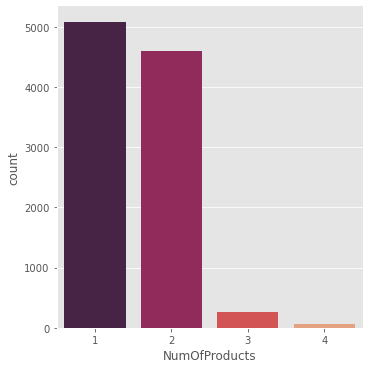

In [23]:
# Distribución del número de productos
sns.catplot(x="NumOfProducts", kind="count",
            palette="rocket", data=data)

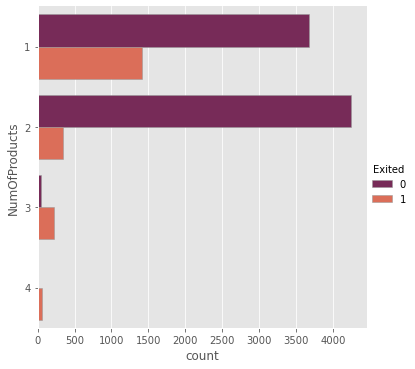

In [24]:
# Número de productos en relación a si sale o no de la empresa
sns.catplot(y="NumOfProducts", hue="Exited", kind="count",
            palette="rocket", edgecolor=".6",
            data=data)

<Figure size 1296x576 with 0 Axes>

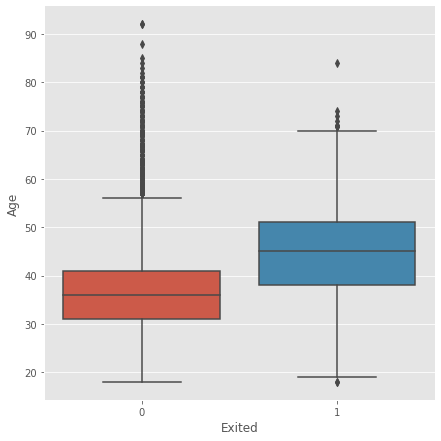

In [25]:
# Gráfico Boxplot Edad y Exited
plt.figure(figsize=(18,8))

sns.catplot(
            data=data,
            x="Exited", 
            y="Age", 
            kind="box", 
            height = 6)

<Figure size 1296x576 with 0 Axes>

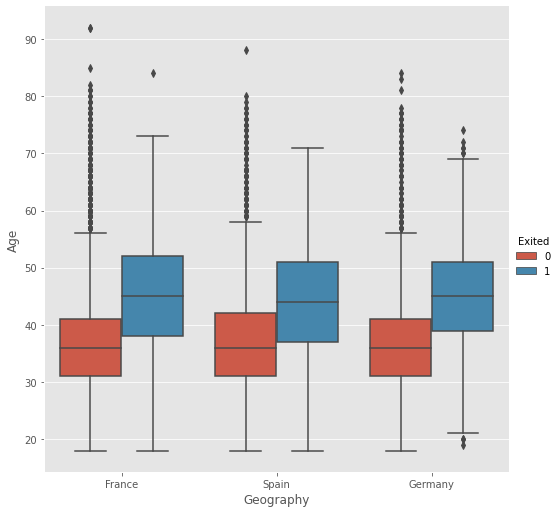

In [26]:
# Gráfico Boxplot Geografía, Edad relación con Exited
plt.figure(figsize=(18,8))
sns.catplot(
            x="Geography", 
            y="Age", 
            kind="box", 
            hue = 'Exited',
            height = 7, data=data)

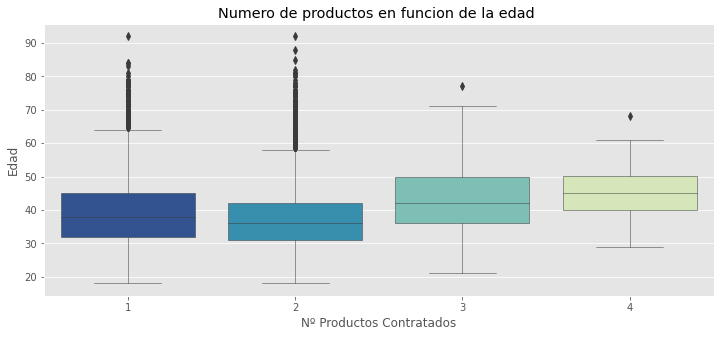

In [27]:
#Numero de productos en funcion de la edad 
f, plt.subplots(figsize=(12, 5))
sns.boxplot(
    x='NumOfProducts', 
    y='Age', 
    data = data, 
    palette = 'YlGnBu_r', 
    linewidth=.5)

plt.title('Numero de productos en funcion de la edad ')
plt.xlabel('Nº Productos Contratados')
plt.ylabel('Edad');

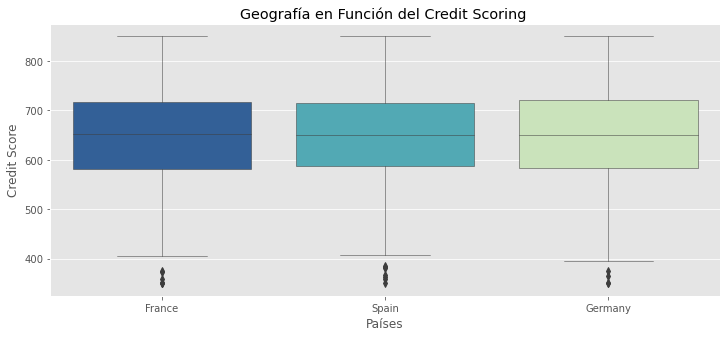

In [28]:
# Geografia en funcion del credit scoring
f, plt.subplots(figsize=(12, 5))
sns.boxplot(
    x='Geography', 
    y='CreditScore', 
    data = data, 
    palette = 'YlGnBu_r', 
    linewidth=.5)

plt.title('Geografía en Función del Credit Scoring ')
plt.xlabel('Países')
plt.ylabel('Credit Score');

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

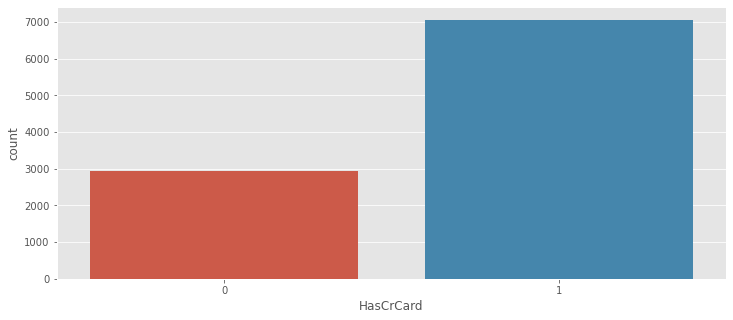

In [29]:
# Cuantos tienen tarjetas de credito
f, plt.subplots(figsize=(12, 5))
sns.countplot(data=data, x = 'HasCrCard')

<Figure size 1296x576 with 0 Axes>

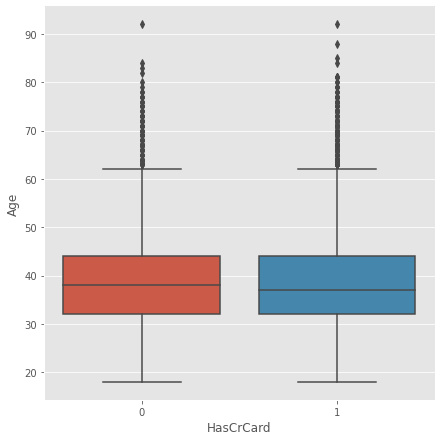

In [30]:
#Tienen tarjeta de credito en funcion de la edad
plt.figure(figsize=(18,8))

sns.catplot(
            data=data,
            x="HasCrCard", 
            y="Age", 
            kind="box", 
            height = 6)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

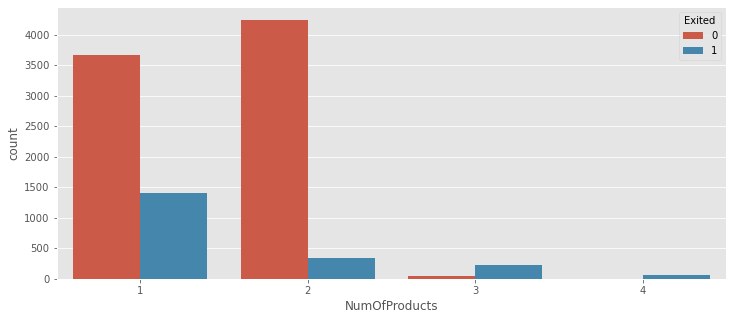

In [31]:
f, plt.subplots(figsize=(12, 5))
sns.countplot(data=data, x = 'NumOfProducts', hue = 'Exited')

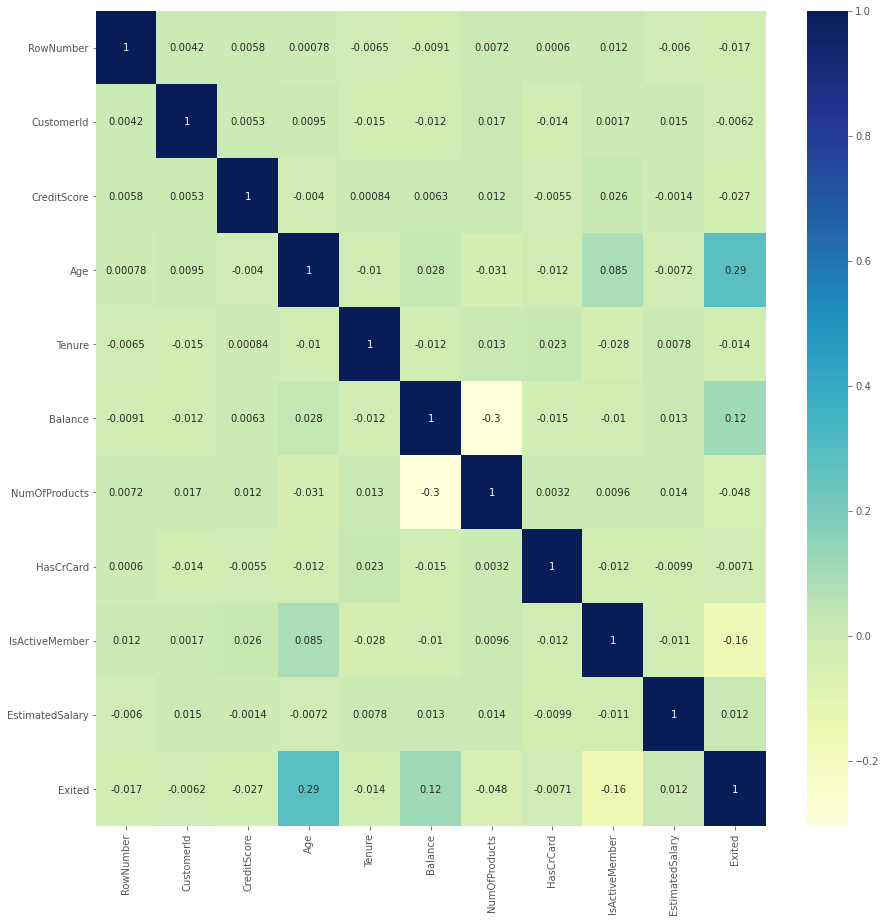

In [32]:
# Gráfico para ver la correlación entre las variables
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, linecolor= 'white', cmap= 'YlGnBu')
plt.show()

Las correlaciones mas destacadas : 

* Entre Age y Exited hay un 0.29
* Entre Numero de productos y Balance un -0.3
* Entre Exited y Balance un 0.12
* Entre Exited y IsActivemember un -0.16

Como se ve apenas hay una correlación importante, analizaremos mas en detalle con un grafico de puntos

Se puede percibir como entre los 25 y 45 años se encuentran una buena parte de los clientes

Se puede ver como no hay gran relación entre la edad y las fugas de cliente

Sin embargo, se puede ver como en edades entre 50 y 60 años las fugas son mas destacadas

En cuanto al genero, la proporción de hombres que se queda en el banco es mayor a la de las mujeres

Pues de las mujeres se van 1200 de 4500 aproximadamente (un 27 %) y de los hombre se van unos 800 de 5500 (14,5 %)



En este caso lo mas destacado, esque en Alemania la mitad de los clientes se han ido.

Para Francia y España la proporción de clientes que se quedan es ampliamente mayor a la de los que se van

En este caso cuando vemos un histograma del balance se ve como hay muchos clientes con balance de 0.0 o cercano a el.

Para saber cuantos clientes hay con Balance 0, podemos filtrar con Pandas de la siguiente manera


Podemos ver como en Francia es en donde estan la mitad de los clientes.

Luego Alemania y España tendrían un 25 y 25 por ciento de todos los clientes analizados.

Predomina el género masculino con alrededor de unos 5500 clientes y el resto serian del género femenino

En cuanto al número de años  que llevan en el banco, vemos que esta repartido de manera bastante parecida excepto 10 y 0 años que hay pocos clientes.

La gran mayoría de clientes tienen entre 1 y 2 productos contratados

Como se puede ver en el grafico de cajas, los clientes que se van tienen una media de edad de unos 45 años
un 25 % de ellos tiene una edad superior a 50 años 

En cambio, los clientes que no se van, tienen una edad media de 35 años 

No se aprecia una gran diferencia entre el Score de credito que les da el banco

en relación a si se van o se quedan en la empresa.

A continuación, vemos si los datos de la variable target "Exited" estan balanceados o no.


En este caso hay un 80 % de los datos de clientes no fuga (0) y el resto de clientes fuga (1)

Hay un desbalanceo de datos puesto que de observaciones 0 hay 4 veces mas que de 1 (fuga)

## Feature Engineering

In [38]:
#Eliminamos la columna RowNumber, y la del  Nombre del cliente 
data = data.drop(columns=['RowNumber', 'Surname'])

In [39]:
# Barajamos los datos por si tuvieran algun tipo de orden
random.seed(1234)
data = shuffle(data)


In [40]:
# División de los datos

X = data.drop('Exited',axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 1234)

## Construcción de Pipelines

Los Pipeline resultan una herramienta crucial en el proceso de Machine Learning. Facilitan el proceso, por el hecho de que todos los pasos pueden agruparse de manera secuencial en otros pasos más genericos.

In [41]:
# Transformador de variables numericas

transformador_numerico = Pipeline(steps=[
    
    # Paso 1: escalar las variables, nombre 'escalador'
    ('escalador', StandardScaler())])
    

In [42]:
# Transformador de variables categóricas: se encargará de imputar los valores perdidos de las variables categóricas y de 

transformador_categorico = Pipeline(steps=[
    
    # Paso 1: codificación de variables categóricas, nombre 'onehot', usamos one hot encoding
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
   

Guardamos los nombres de las variables numéricas (formatos int64 y float) y las categóricas (object) para poder usarlos en los pipelines



In [43]:
# Las numéricas
variables_numericas = data.select_dtypes(include=['int64', 'float64']).drop(['Exited'], axis=1).columns

# Las categóricas (excluida la dependiente)
variables_categoricas = data.select_dtypes(include=['object']).columns

In [44]:
#Construimos el procesador

preprocesador = ColumnTransformer(
    transformers=[
        # Primer transformador, lo llamamos numericas: aplica los pasos del trasnformador numerico
        # a las variables de 'variables_numericas'
        ('numericas', transformador_numerico, variables_numericas),
        
        # Segundo trasnformador, lo llamamos categoricas: aplica los pasos del transformacor categórico
        # a las variables de 'variables_categoricas'
        ('categoricas', transformador_categorico, variables_categoricas)])

# Construcción de Modelos

In [45]:
# Montamos el clasificador
from sklearn.linear_model import LogisticRegressionCV 

regresion_logistica = Pipeline(steps=[
    ('preprocesador', preprocesador), # primero se pre-procesan los datos
    
    ('clasificador', LogisticRegressionCV(cv=10, # validación cruzada de 10 folds
                                          random_state=1234))])

In [46]:
regresion_logistica.fit(X_train, y_train)


Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('numericas',
                                                  Pipeline(steps=[('escalador',
                                                                   StandardScaler())]),
                                                  Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('categoricas',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('clasificador',
                 LogisticRegressionCV(cv=10, random_state=1234))])

In [47]:
regresion_logistica.score(X_train, y_train) # 78.74% en entrenamiento


0.81175

In [48]:
regresion_logistica.score(X_test, y_test) # 78.73%, en test, muy similar, descartamos overfitting


0.805

In [49]:
# Creamos una lista adjuntando los algoritmos que probaremos en el conjunto de datos
models = []

models.append(('Logistic Regression', LogisticRegression()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('Decision Tree', DecisionTreeClassifier()))

models.append(('Random Forest', RandomForestClassifier()))

models.append(('SVM', SVC()))

models.append(('XGradientBoosting', GradientBoostingClassifier()))

In [50]:
# Función para plotear los algoritmos

def boxplots_algorithms(results, names):
    '''
    Para plotear en forma de Boxplot los resultados
    
    '''
    
    plt.figure(figsize=(10,10))
    
    plt.boxplot(results)
    
    plt.xticks(range(1,len(names)+1), names)
    
    plt.show()

Logistic Regression: 0.809500 (0.011707)
KNN: 0.831900 (0.013715)
Decision Tree: 0.789600 (0.017431)
Random Forest: 0.860500 (0.006391)
SVM: 0.855500 (0.006185)
XGradientBoosting: 0.863700 (0.006404)


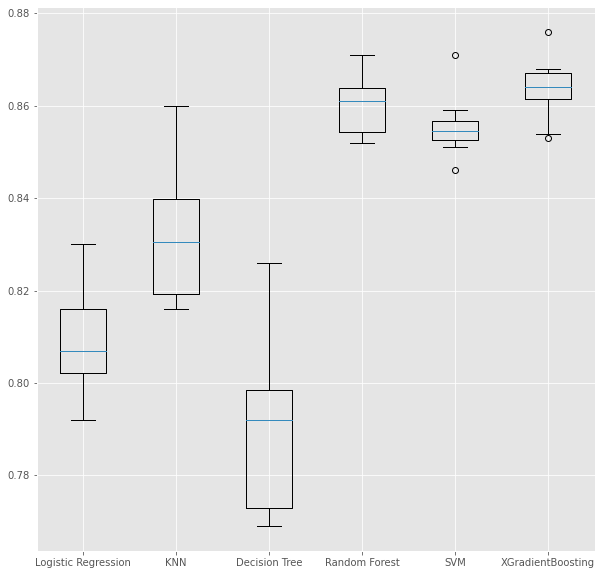

In [51]:
# Creamos un bucle para procesar todos los algoritmos y el pipeline 

results = []

names = []

for name, alg in models:
    
    model = make_pipeline(preprocesador,alg) # Pipeline del preprocesado y la lista de algoritmos
    
    cv_technique = KFold(n_splits = 10 ,shuffle = True,random_state = 92) # Cross validation 
    
    cv_results = cross_val_score(estimator = model, X = X, y = y, cv = cv_technique) # Procesamos todos los pasos anteriores
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
    
    results.append(cv_results)
    
    names.append(name)
    

boxplots_algorithms(results, names) 

Tras realizar el preprocesado de datos y hacer el pipeline del preprocesado y de los modelos

Se obtienen unos resultados bastante buenos en el train.

Asi se puede observar:

* El algoritmo que da un peor resultado es la regresión logistica con un 0.80 de accuracy. 


* Los algoritmos mas competitivos son SVM, Random Forest y el mejor XGradientBoosting.


* El XGradientBoosting da un accuracy de 0.86 


A continuación se hará una comparación de modelos.

Para ellos se analizaran el SVM y el XGB pues han sido los algoritmos con mejor resultado.





# Model Selection

Para comparar los modelos, calculamos su precisión, graficamos la curva ROC y obtenemos su matriz de confusión normalizada. Utilzamos la matriz para explorar la distribucion de los errores, puesto que evaluar solo los modelos en términos de accuracy sería un error

Primero se calcula para cada modelo las tres métricas mencioandas y no se comentan ni se evalúan hasta el final, donde se construye una tabla con las métricas de cada modelo, se selecciona al ganador y se justifica la decisión

Creamos una serie de funciones para comparar las métricas

In [52]:
# Accuracy
def accuracy(modelo):
    '''
    Solo toma como arumento el modelo del que se quiere
    calcular el accuracy. Es necesario que los objetos X_test e y_test 
    estén definidos previamente
    
    '''
    
    return modelo.score(X_test, y_test)

In [53]:
def grafico_roc(modelo, titulo):
    '''
    Toma como argumentos el modelo y el título del gráfico. 
    Utiliza el modelo para sacar la predicción en términos de 
    probabilidad. Es necesario que los objetos X_test e y_test 
    hayan sido definidos fuera de la función previamente.
    
    '''
    
    # Se calcula la predicción en términos de probabilidad
    y_probabilidad = modelo.predict_proba(X_test)
    
    # Se realiza el gráfico 
    skplt.metrics.plot_roc(y_test, y_probabilidad, figsize=(12, 7))
    plt.title(titulo);

In [54]:
# Función gráfico matriz de confusión

def plot_matriz_confusion(modelo, titulo):
    '''
    Toma como argumentos el modelo y el título del plot.
    Se calcula la predicción y la matriz de confusión, y se manipulan los datos
    de tal manera que se puedan representar en un heatmap 2x2, con los datos en valor
    absoluto y los datos normalizados. Es necesario que los objetos X_test e y_test hayan sido
    definidos previamente
    
    '''
    prediccion = modelo.predict(X_test) # la predicción
    
    confusion = confusion_matrix(y_test, prediccion) # la matriz de confusión
    
    # Definimos los elementos que van a ir dentro del gráfico: texto y número
    etiquetas = ['Verdaderos negativos', 'Falsos Negativos', 'Falsos positivos', 'Verdaderos positivos']
    
    totales = ['{0:0.0f}'.format(value) for value in
                confusion.flatten()] # matriz 'plana'
    
    porcentuales = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)] # calcula el porcentaje 
    
    # Las etiquetas que iran dentro del plot
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(etiquetas, totales, porcentuales)]
    
    labels = np.asarray(labels).reshape(2,2)
    
    # Y ahora el plot
    plt.subplots(figsize=(10, 5))
    
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Greens')
    plt.title(titulo)
    plt.xlabel('Valor real')
    plt.ylabel('Valor estimado')

## SVM (SUPER VECTOR MACHINE)

In [55]:
# Entrenamos de nuevo el SVM con algunos nuevos parámetros
svm = Pipeline(steps=[
    ('preprocesado', preprocesador),
    
    ('clasificador', SVC(random_state=1234,
                         kernel='rbf', # kernel radial
                         max_iter=1200,
                         probability=True))]) # límite 3000 iteraciones

In [56]:
svm.fit(X_train, y_train)


Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('numericas',
                                                  Pipeline(steps=[('escalador',
                                                                   StandardScaler())]),
                                                  Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('categoricas',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('clasificador',
                 SVC(max_iter=1200, probability=True, random_state=1234))])

In [57]:
accuracy(svm)

0.8565

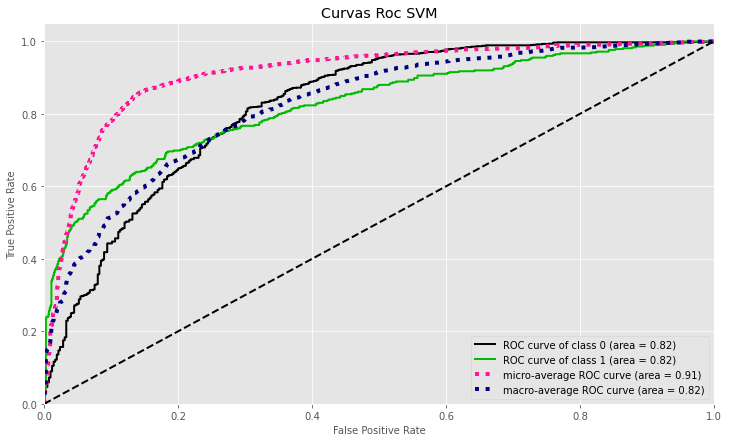

In [58]:
grafico_roc(svm,'Curvas Roc SVM')

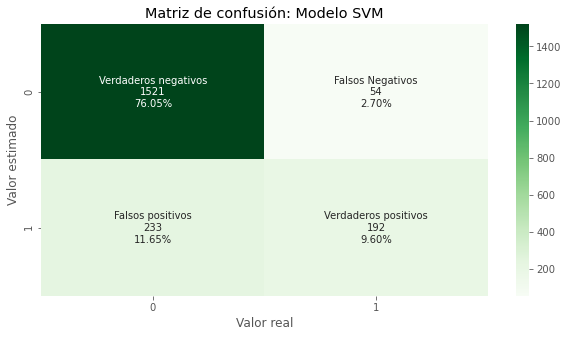

In [59]:
plot_matriz_confusion(svm, 'Matriz de confusión: Modelo SVM')


* Accuracy : 86.3 %
* Falsos Positivos: 12.05 %
* Falso Negativo: 1.65 % 

##  XGB Gradient Boosting

In [60]:
XGBoost = Pipeline(steps=[
    ('preprocesador', preprocesador),
    
    ('clasificador', GradientBoostingClassifier())])

In [61]:
XGBoost.fit(X_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('numericas',
                                                  Pipeline(steps=[('escalador',
                                                                   StandardScaler())]),
                                                  Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('categoricas',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('clasificador', GradientBoostingClassifier())])

In [62]:
XGBoost.score(X_train, y_train)

0.876375

In [63]:
XGBoost.score(X_test, y_test)

0.8625

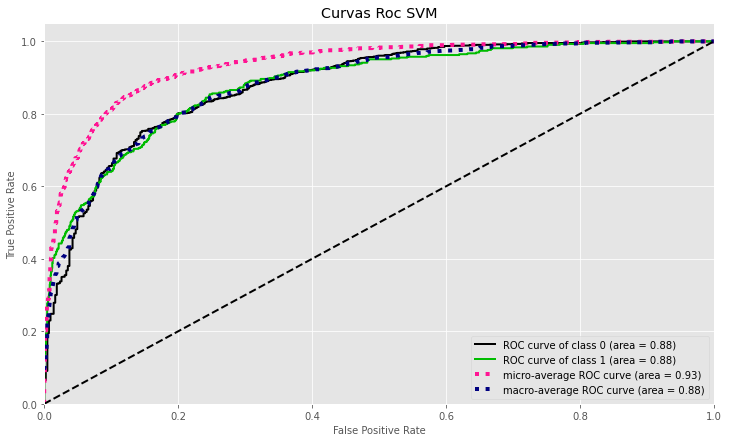

In [64]:
grafico_roc(XGBoost,'Curvas Roc SVM')

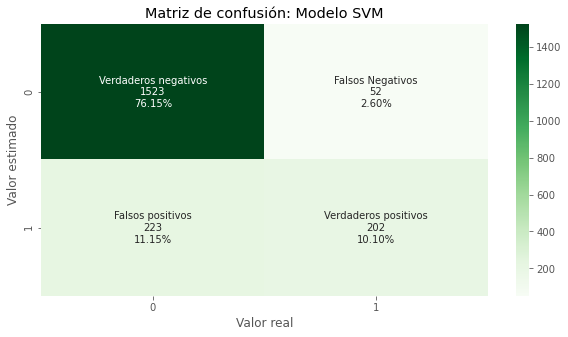

In [65]:
plot_matriz_confusion(XGBoost, 'Matriz de confusión: Modelo SVM')


En este caso el modelo tiene algo mas de precisión que el SVM

Sin embargo, en cuanto a la tasa de falsos negativos que es la que queremos reducir
es algo peor que el SVM.

El objetivo es intentar reducir al máximo posibles los falsos negativos, es decir, el modelo

predice que el cliente no se va,pero en realidad el cliente se va.

Por lo que nos quedamos con el SVM

# Metrics and Interpretability

In [66]:
# Predicción en forma de label
prediccion_XGBoost = XGBoost.predict(X_test)

# Predicción en forma de probabilidad
probabilidad_prediccion_XGBoost = XGBoost.predict_proba(X_test)

In [67]:
datos_importancia_variables = XGBoost.named_steps.clasificador.feature_importances_
datos_importancia_variables

array([1.10189834e-02, 1.59721022e-02, 3.93988606e-01, 4.19139538e-03,
       8.76820509e-02, 2.93073563e-01, 1.09868845e-03, 1.05918187e-01,
       1.65982759e-02, 7.91470710e-04, 5.80333021e-02, 2.26245694e-04,
       5.40139417e-03, 6.00573478e-03])

In [68]:
# Construimos los datos ordenados en función de la importancia 
importancia_variables = sorted(
                              list(zip(X_test.columns, # el nombre de las variables 
                                       datos_importancia_variables)), # el valor de la importancia que tienen
    
    key=lambda tupla: tupla[1], # de cada tupla, el primer elemento
    reverse=True) # Orden de mayor a menor

In [69]:
importancia_variables_df = pd.DataFrame(importancia_variables)

In [70]:
# Cambiamos el nombre de las columnas 
importancia_variables_df.rename(columns={ 0: 'Variable',  1: 'Importancia'}, inplace=True)

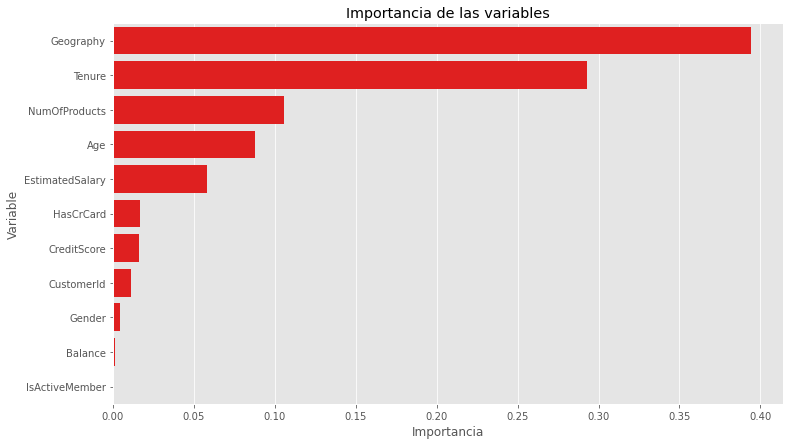

In [71]:
plt.figure(figsize=(12, 7))

sns.barplot(x='Importancia',
            y='Variable', 
            data=importancia_variables_df, 
            color='red')

plt.title('Importancia de las variables');

# Summary
